In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [ ]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d keplersmachines/kepler-labelled-time-series-data

 73% 41.0M/55.9M [00:01<00:00, 26.8MB/s]
100% 55.9M/55.9M [00:01<00:00, 48.2MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  kepler-labelled-time-series-data.zip
  inflating: exoTest.csv             
  inflating: exoTrain.csv            


In [ ]:
import pandas as pd
exo_train=pd.read_csv('/content/drive/MyDrive/Kaggle/exoplanet/exoTrain.csv')
exo_test=pd.read_csv('/content/drive/MyDrive/Kaggle/exoplanet/exoTest.csv')

In [ ]:
exo_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
X_train  = exo_train.drop(['LABEL'],axis=1).values
y_train  = exo_train['LABEL'].values

X_test  = exo_test.drop(['LABEL'],axis=1).values
y_test  = exo_test['LABEL'].values

In [ ]:
X_train.shape

(5087, 3197)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

From here we will be training the datset using ANN

In [ ]:
from keras.models import Sequential  
from keras.layers import Dense 
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=3197))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                204672    
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 208,897
Trainable params: 208,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train, batch_size=32,epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
159/159 [==============================] - 1s 4ms/step - loss: 0.1960 - accuracy: 0.9933 - val_loss: -0.0567 - val_accuracy: 0.9912
Epoch 2/5
159/159 [==============================] - 0s 3ms/step - loss: -0.3874 - accuracy: 0.9919 - val_loss: -0.5899 - val_accuracy: 0.9912
Epoch 3/5
159/159 [==============================] - 0s 3ms/step - loss: -3.0602 - accuracy: 0.9915 - val_loss: -2.2047 - val_accuracy: 0.9912
Epoch 4/5
159/159 [==============================] - 0s 3ms/step - loss: -10.2360 - accuracy: 0.9934 - val_loss: -5.6754 - val_accuracy: 0.9912
Epoch 5/5
159/159 [==============================] - 1s 4ms/step - loss: -22.0464 - accuracy: 0.9937 - val_loss: -13.0790 - val_accuracy: 0.9912


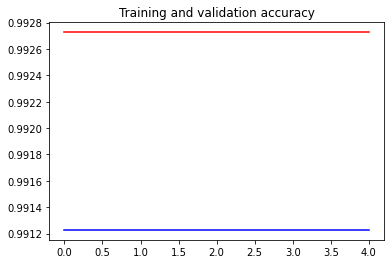

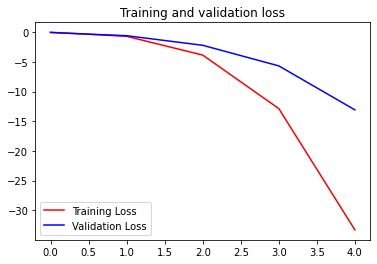

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

From here we will be using CNN for predicting the values.

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_train.shape

(5087, 3197, 1)

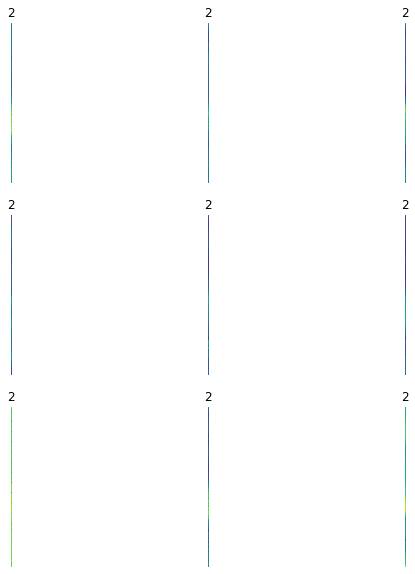

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,10))
rows = 3
columns = 3
for i in range(9):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(X_train[i+1].reshape(3197,1))
  plt.axis('off') 
  plt.title(y_train[i+1])

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
classifier = Sequential()
classifier.add(Convolution1D(filters=8, kernel_size=5, activation="relu", input_shape=(3197,1)))
classifier.add(MaxPooling1D(strides=4))
classifier.add(Convolution1D(filters=8, kernel_size=5, activation="relu", input_shape=(3197,1)))
classifier.add(MaxPooling1D(strides=4))
classifier.add(Flatten())
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 3193, 8)           48        
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 798, 8)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 794, 8)            328       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 199, 8)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1592)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                101952    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [ ]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history= classifier.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
159/159 [==============================] - 6s 32ms/step - loss: -0.1906 - accuracy: 0.9615 - val_loss: -4.9573 - val_accuracy: 0.9912
Epoch 2/5
159/159 [==============================] - 5s 29ms/step - loss: -13.3378 - accuracy: 0.9940 - val_loss: -131.9811 - val_accuracy: 0.9912
Epoch 3/5
159/159 [==============================] - 5s 30ms/step - loss: -184.5498 - accuracy: 0.9928 - val_loss: -670.8914 - val_accuracy: 0.9912
Epoch 4/5
159/159 [==============================] - 5s 29ms/step - loss: -791.4494 - accuracy: 0.9925 - val_loss: -2233.3438 - val_accuracy: 0.9912
Epoch 5/5
159/159 [==============================] - 5s 29ms/step - loss: -1973.8042 - accuracy: 0.9940 - val_loss: -5736.6357 - val_accuracy: 0.9912


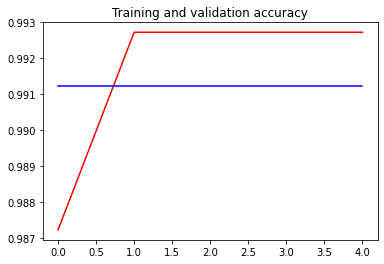

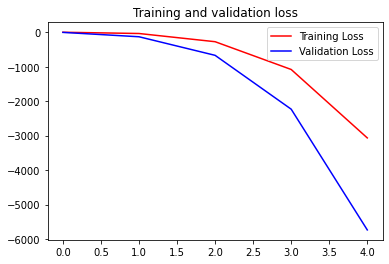

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()